In [2]:
import torch 
from torch import nn

In [3]:
net = nn.Sequential(nn.LazyLinear(8),nn.ReLU(),nn.LazyLinear(1))
X = torch.rand(size=(2,4))
net(X).shape

/home/akshatsrivastava/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([2, 1])

In [4]:
##Build in init

In [5]:
def init_normal(module):
    if type(module) == nn.Linear:
        nn.init.normal_(module.weight,mean=0,std=0.01)
        nn.init.zeros_(module.bias)

net.apply(init_normal)
net[0].weight.data[0],net[0].bias.data[0]

(tensor([-0.0084,  0.0103,  0.0016,  0.0060]), tensor(0.))

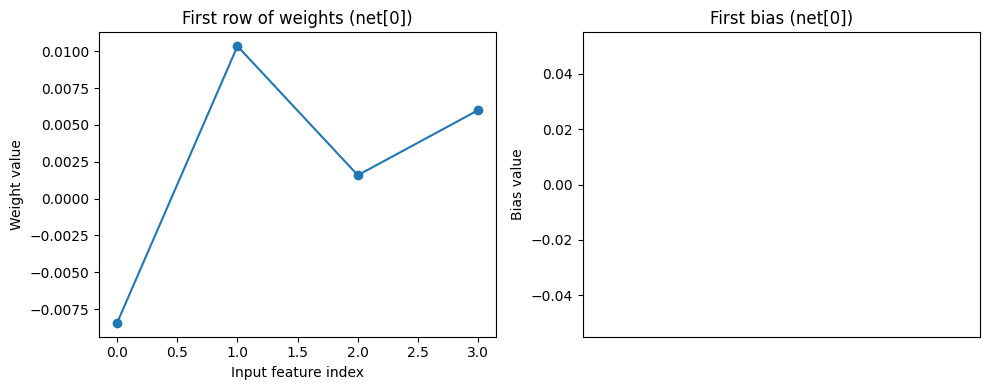

In [6]:
import torch
import matplotlib.pyplot as plt

# Example: assume net is your NestMLP or SharedMLP
# Get first row of weights and first bias
w0 = net[0].weight.data[0].cpu().numpy()  # first row of weight
b0 = net[0].bias.data[0].cpu().numpy()    # first bias (scalar)

# Plot weights
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(w0, marker='o')
plt.title("First row of weights (net[0])")
plt.xlabel("Input feature index")
plt.ylabel("Weight value")

# Plot bias
plt.subplot(1,2,2)
plt.bar([0], [b0])
plt.title("First bias (net[0])")
plt.ylabel("Bias value")
plt.xticks([])

plt.tight_layout()
plt.show()


In [7]:
def init_constant(module):
    if type(module) == nn.Linear:
        nn.init.constant_(module.weight, 1)
        nn.init.zeros_(module.bias)

net.apply(init_constant)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([1., 1., 1., 1.]), tensor(0.))

In [8]:
def init_xavier(module):
    if type(module) == nn.Linear:
        nn.init.xavier_uniform_(module.weight)

def init_42(module):
    if type(module) == nn.Linear:
        nn.init.constant_(module.weight, 42)

net[0].apply(init_xavier)
net[2].apply(init_42)
print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([ 0.2349, -0.6135,  0.5806, -0.5491])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


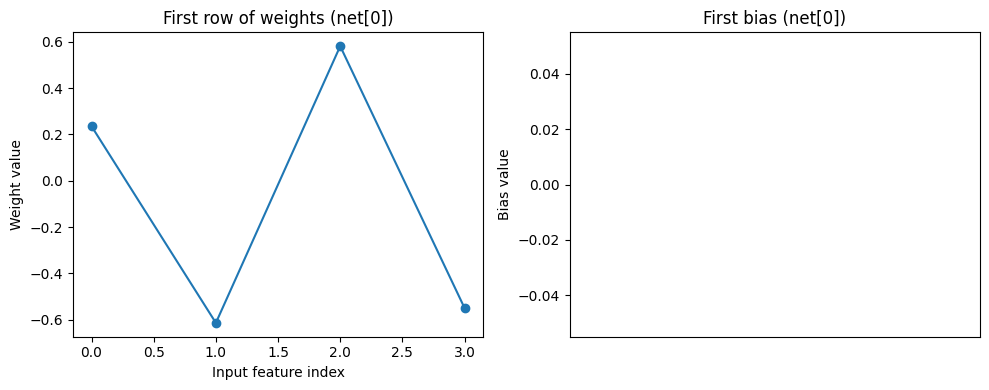

In [9]:
import torch
import matplotlib.pyplot as plt

# Example: assume net is your NestMLP or SharedMLP
# Get first row of weights and first bias
w0 = net[0].weight.data[0].cpu().numpy()  # first row of weight
b0 = net[0].bias.data[0].cpu().numpy()    # first bias (scalar)

# Plot weights
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(w0, marker='o')
plt.title("First row of weights (net[0])")
plt.xlabel("Input feature index")
plt.ylabel("Weight value")

# Plot bias
plt.subplot(1,2,2)
plt.bar([0], [b0])
plt.title("First bias (net[0])")
plt.ylabel("Bias value")
plt.xticks([])

plt.tight_layout()
plt.show()


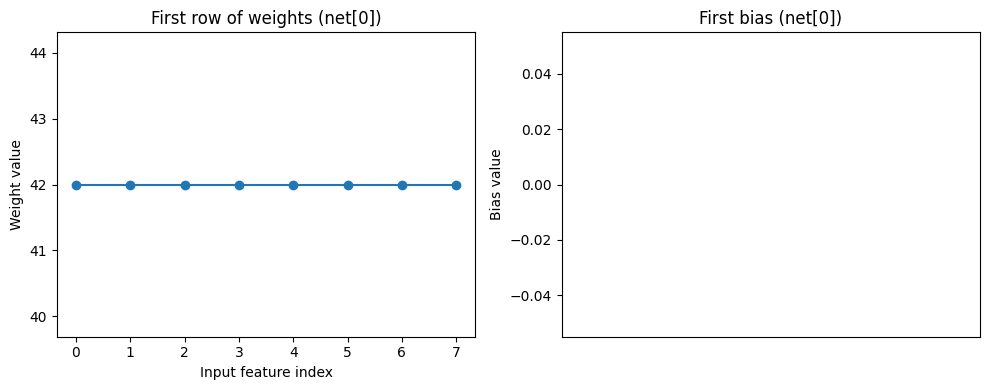

In [10]:
import torch
import matplotlib.pyplot as plt

# Example: assume net is your NestMLP or SharedMLP
# Get first row of weights and first bias
w0 = net[2].weight.data[0].cpu().numpy()  # first row of weight
b0 = net[2].bias.data[0].cpu().numpy()    # first bias (scalar)

# Plot weights
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(w0, marker='o')
plt.title("First row of weights (net[0])")
plt.xlabel("Input feature index")
plt.ylabel("Weight value")

# Plot bias
plt.subplot(1,2,2)
plt.bar([0], [b0])
plt.title("First bias (net[0])")
plt.ylabel("Bias value")
plt.xticks([])

plt.tight_layout()
plt.show()


## CUSTOM INIT

In [11]:
def my_init(module):
    if type(module) == nn.Linear:
        print("Init", *[(name, param.shape)
                        for name, param in module.named_parameters()][0])
        nn.init.uniform_(module.weight, -10, 10)
        module.weight.data *= module.weight.data.abs() >= 5

net.apply(my_init)
net[0].weight[:2]

Init weight torch.Size([8, 4])
Init weight torch.Size([1, 8])


tensor([[-0.0000,  7.3351, -0.0000, -0.0000],
        [ 0.0000, -5.9371, -5.1583, -5.0617]], grad_fn=<SliceBackward0>)

In [12]:
net[0].weight.data[:] +=1 
net[0].weight.data[0,0] = 42
net[0].weight.data[0]

tensor([42.0000,  8.3351,  1.0000,  1.0000])

In [13]:
## Lazy Init

In [14]:
import torch 
from torch import nn
from d2l import torch as d2l

In [15]:
##let's start the mlp

In [16]:
net = nn.Sequential(nn.LazyLinear(256),nn.ReLU(),nn.LazyLinear(10))

/home/akshatsrivastava/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [17]:
net[0].weight

<UninitializedParameter>

In [19]:
X = torch.rand(2, 20)
net(X)

net[0].weight


Parameter containing:
tensor([[-0.0650,  0.0003, -0.1821,  ..., -0.0370, -0.1560,  0.1959],
        [-0.1626,  0.0837, -0.0364,  ..., -0.0871, -0.1678, -0.1268],
        [ 0.1787, -0.0737,  0.1155,  ...,  0.1042, -0.0869, -0.2102],
        ...,
        [ 0.0069, -0.1733, -0.0732,  ...,  0.1747, -0.2180, -0.0513],
        [-0.0286,  0.0675, -0.1969,  ..., -0.0627, -0.0030, -0.1888],
        [-0.0230, -0.0017,  0.0958,  ..., -0.0046,  0.0022, -0.1561]],
       requires_grad=True)

In [20]:
@d2l.add_to_class(d2l.Module)  #@save
def apply_init(self, inputs, init=None):
    self.forward(*inputs)
    if init is not None:
        self.net.apply(init)


## Custom Layers

In [28]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [21]:
class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,X):
        return X - X.mean()

layer = CenteredLayer()
layer(torch.tensor([1.0,2,3,4,5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [22]:
net = nn.Sequential(nn.LazyLinear(128),CenteredLayer())

In [23]:
Y = net(torch.rand(4,8))
Y.mean()

tensor(3.7253e-09, grad_fn=<MeanBackward0>)

In [24]:
## Layer with parameters

In [25]:
class MyLinear(nn.Module):
    def __init__(self,in_units,units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units,units))
        self.bias = nn.Parameter(torch.randn(units,))
    def forward(self,X):
        linear = torch.matmul(X,self.weight.data) + self.bias.data
        return F.relu(linear)

In [26]:
linear = MyLinear(5,3)
linear.weight

Parameter containing:
tensor([[ 0.2388,  0.0276,  0.2871],
        [-0.4915,  0.2199, -0.6410],
        [-0.8894, -0.9299,  1.8720],
        [ 0.6982,  1.3301,  0.5451],
        [ 0.2089,  0.6193,  0.2040]], requires_grad=True)

In [29]:
linear(torch.rand(2,5))

tensor([[0.0000, 1.9739, 0.9479],
        [0.0000, 2.3141, 0.3862]])

In [30]:
##net
net = nn.Sequential(MyLinear(64,8),MyLinear(8,1))
net(torch.rand(2,64))

tensor([[17.4573],
        [20.3832]])